In [45]:
import pandas as pd 
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

In [3]:
df = pd.read_parquet('data/data_flatten.parquet')

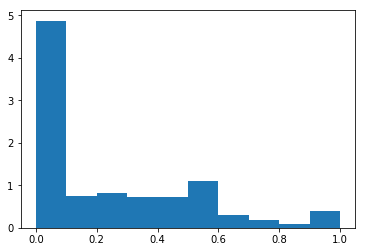

In [7]:
plt.hist(df.subjectivity.values, normed=True)
plt.show()

In [11]:
df.subjectivity.describe()

count    179215.000000
mean          0.229378
std           0.276993
min           0.000000
25%           0.000000
50%           0.100000
75%           0.416667
max           1.000000
Name: subjectivity, dtype: float64

In [17]:
df.objectivity.describe()

count    175687.000000
mean          0.911815
std           0.064397
min           0.083333
25%           0.881058
50%           0.924721
75%           0.956743
max           1.000000
Name: objectivity, dtype: float64

In [86]:
obj = df[df['subjectivity'] <= 0.1]
obj = obj[obj['sentence_uk'].str.contains('вважає') == False]
obj = obj[obj['sentence_uk'].str.contains('вважаю') == False]
obj = obj[obj['sentence_uk'].str.contains('думку') == False]

obj['y'] = 0

obj = obj[['subjectivity', 'sentence_uk', 'y']]

print('Objective', len(obj))

obj.head(20).values

Objective 90803


array([[0.0,
        'Президент Петро Порошенко дав доручення міністру оборони Степану Полтораку забезпечити підвищення грошового забезпечення сержантському складу ЗСУ.',
        0],
       [0.0,
        "Відповідне доручення він дав під час участі у зборах сержантського і старшинського складу ЗСУ на полігоні у Житомирській області у п'ятницю, інформує  прес-служба президента.",
        0],
       [0.0, 'Це не прийнятно", - звернувся глава держави до Полторака.',
        0],
       [0.0, 'Він розпорядився втілити це в життя і доповісти.', 0],
       [0.06666666666666667,
        'Порошенко також нагадав, що на останньому засіданні РНБО було прийнято стратегічний оборонний бюлетень, який визначає програму реформування сектора оборони і безпеки.',
        0],
       [0.0, 'Українська правда', 0],
       [0.0,
        'Про це в ефірі  Громадського  сказав Валерій Чалий, посол України в США.',
        0],
       [0.0,
        'Він відзначив важливість сигналу, який США подали Росії в конте

In [87]:
subj = df[df['subjectivity'] >= 0.7]

subj_1 = df[df['sentence_uk'].str.contains('вважає')]
subj_2 = df[df['sentence_uk'].str.contains('вважаю')]
subj_3 = df[df['sentence_uk'].str.contains('думку')]

subj = pd.concat([subj, subj_1, subj_2, subj_3])[['subjectivity', 'sentence_uk']]

subj['y'] = 1

print('Subjective', len(subj))

shuffle(subj).head(20).values

Subjective 16703


array([[0.7,
        '16% зазначили, що рівень чиновників знизився, 3,3% - що виріс.',
        1],
       [0.775,
        '"Генеральної прокуратурою розслідується кримінальне провадження за фактом вчинення тяжких та особливо тяжких злочинів одним із народних депутатів", - сказав Шокін.',
        1],
       [1.0,
        'Інформацію про це також  підтвердив і голова Радикальної партії  Олег Ляшко.',
        1],
       [1.0,
        "Лінія розмежування проходить не тільки по території Донбасу - вона пролягла через сім'ї та долі його жителів.",
        1],
       [0.0,
        '"Ми вважаємо, що найближчими днями відбудеться звільнення.', 1],
       [0.75,
        'Раніше, він зажадав позачергового засідання уряду і зняття функції з охорони судів з підконтрольних його відомству Нацполіції і Нацгвардії.',
        1],
       [0.7,
        'Греція передає Росії секретні дані, які Афіни отримують від союзників по НАТО.',
        1],
       [0.9,
        '"Я закликаю всі цивілізовані країни доп

In [83]:
df[df['sentence_uk'].str.contains('думку')][['subjectivity', 'sentence_uk']].head(20).values


array([[1.0,
        '"Для того, щоб повернутися на шлях багатопланового партнерства, треба лише відмовитися від порочної логіки "гри в одні ворота", на ділі враховувати думку й інтереси один одного", - йдеться в статті Путіна.'],
       [0.95,
        'Таку думку висловив глава представництва ЄС в Україні Ян Томбінський\xa0під час панельної дискусії "Як бути успішним в Європі?"'],
       [0.4625,
        'На її думку, не кожен зможе впоратися з функціями НАЗК, а реальна робота "ось-ось почнеться".'],
       [0.0,
        'На думку прокурорів, компанія представляла себе як виробника дорожного обладнання і замаскувала поставки, щоб уникнути експортного контролю США.'],
       [0.4270833333333333,
        'На думку Долгова, стратегія стримування РФ є головним геополітичним фактором, який буде домінувати і визначати дії не тільки країн-членів НАТО, а й інших гравців в сфері безпеки на більш тривалий період.'],
       [0.3,
        'Таку думку Обама висловив після розмови з держсекретарем 

In [90]:
result = pd.concat([obj, subj])
result.to_parquet('data/classification_data.parquet', compression='uncompressed')